In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# np.random.seed(40)
# # Đọc file CSV
# df = pd.read_csv('BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)

# # Tìm các bản ghi có 'Book-Rating' là 0
# zero_ratings = df[df['Book-Rating'] == 0]

# # Tính số lượng bản ghi cần chỉnh sửa (80% của các bản ghi có giá trị 0)
# num_to_change = int(len(zero_ratings) * 0.8)

# # Lựa chọn ngẫu nhiên các bản ghi
# indices_to_change = zero_ratings.sample(n=num_to_change, random_state=1).index

# # Chỉnh sửa các giá trị đã chọn thành giá trị ngẫu nhiên từ 2 đến 8
# df.loc[indices_to_change, 'Book-Rating'] = np.random.randint(0, 9, size=num_to_change)

# # Ghi lại file CSV mới
# df.to_csv('BX-Book-Ratings-Modified.csv', index=False, sep=';')

In [129]:
# data_Users = pd.read_csv('data/BX-Users.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
# data_Books = pd.read_csv('data/BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
# data_Ratings = pd.read_csv('BX-Book-Ratings-Modified.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)

In [130]:
# data_Full = data_Users.merge(data_Books.merge(data_Ratings, on="ISBN"), on="User-ID")

In [131]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data_Full['Book-Rating'], bins=10, kde=True)
# plt.title('Phân bố điểm đánh giá sách')
# plt.xlabel('Rating')
# plt.ylabel('Số lượng')
# plt.show()

# Test lại tất cả

In [132]:
import pandas as pd 
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [436]:
data_Users = pd.read_csv('data/BX-Users.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
data_Books = pd.read_csv('data/BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
data_Ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
key_works = ['#', 'n/a', '-------,', '?ú?{', 'c', 'lkjlj', '87510', '23232', 'xxxxxx', 'l', '30064', 'in', '\\n/a\\""', 'a', '85021', '\\"n/a\\""', '01776', 'nl', 'x']
def replace_with_unknown(str):
    if str in key_works:
        return 'unknown'
    return str

data_Users.drop(columns=['Age'], inplace=True)
data_Users['Location'] = data_Users['Location'].str.split(',').str[-1].str.strip()
data_Users['Location'] = data_Users['Location'].astype(str).apply(replace_with_unknown)
data_Users.rename(columns={"User-ID":'ID_User'}, inplace=True)

for i in ['0', '2021', 'DK Publishing Inc', 'Gallimard', '1378', '2024', '1376', '2037']:
    print(f'{i}:', data_Books[data_Books['Year-Of-Publication'] == i].shape)

img_url = ['http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg', 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg', 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg']

def change_col_value(id_book):
    idx_row = data_Books[data_Books['ISBN'] == id_book].index

    data_Books.loc[idx_row,'Image-URL-L'] = data_Books.loc[idx_row,'Image-URL-M']
    data_Books.loc[idx_row,'Image-URL-M'] = data_Books.loc[idx_row,'Image-URL-S']
    data_Books.loc[idx_row,'Image-URL-S'] = data_Books.loc[idx_row,'Publisher']
    data_Books.loc[idx_row,'Publisher'] = data_Books.loc[idx_row,'Year-Of-Publication']
    data_Books.loc[idx_row,'Year-Of-Publication'] = data_Books.loc[idx_row,'Book-Author']

    book_title = str(data_Books.loc[idx_row, 'Book-Title'].iloc[0])
    data_Books.loc[idx_row, 'Book-Title'] = book_title.split('\\')[0]
    
    Author = book_title.split('\\')[1].replace('"', '').replace(';', '')
    data_Books.loc[idx_row, 'Book-Author'] = Author

change_col_value('078946697X')
change_col_value('2070426769')
change_col_value('0789466953')

key_works = ['S', 'J', 'Ai', 'X', 'N', 'Ed', 'Ty', 'tk', 'Na', 'P3', 'Ky', 'ky','Bh', 'F', 'M']
data_Books['Book-Author'] = data_Books['Book-Author'].astype(str).apply(replace_with_unknown)

key_works = ['0', '2021', 'DK Publishing Inc', 'Gallimard', '1378', '2024', '1376', '2037']
data_Books['Year-Of-Publication'] = data_Books['Year-Of-Publication'].astype(str).apply(replace_with_unknown)

data_Books = data_Books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

data_Books.rename(columns={'ISBN':'ID_Book',
                     'Book-Title':'Name_Book',
                      'Book-Author':'Author',
                     'Year-Of-Publication':'Year',
                     'Image-URL-L':"Img_url"},inplace=True)

0: (4618, 8)
2021: (1, 8)
DK Publishing Inc: (2, 8)
Gallimard: (1, 8)
1378: (1, 8)
2024: (1, 8)
1376: (1, 8)
2037: (1, 8)


In [438]:
book_rating_counts = data_Ratings['ISBN'].value_counts()
index_filtered_books = list(book_rating_counts[(book_rating_counts >= 50)].index)
data_Ratings = data_Ratings[data_Ratings['ISBN'].apply(lambda x: x in index_filtered_books)]

data_Ratings.shape

(237293, 3)

In [439]:
user_rating_counts = data_Ratings['User-ID'].value_counts()
index_filtered_users = list(user_rating_counts[(user_rating_counts >= 20) & (user_rating_counts <= 250)].index)
data_Ratings = data_Ratings[data_Ratings['User-ID'].apply(lambda x: x in index_filtered_users)]

data_Ratings.shape

(110793, 3)

In [440]:
# data_Ratings = pd.read_csv('BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
data_Ratings['Book-Rating'].value_counts()

Book-Rating
0     29372
7     12275
5      9790
6      9120
8      8529
10     7285
3      7103
4      7097
2      6926
1      6728
9      6568
Name: count, dtype: int64

In [303]:
# data_Ratings = data_Ratings[data_Ratings['Book-Rating'] != 0]

In [442]:
for i in range(0,11):
    print(f"Số lượng Rating {i} của 15 user cao nhất")
    print(data_Ratings[data_Ratings['Book-Rating'] == i]['User-ID'].value_counts().head(25))
    print('\n')

Số lượng Rating 0 của 15 user cao nhất
User-ID
238781    105
278418     87
11601      87
170518     84
274308     84
130474     83
36836      83
195694     83
87746      81
184299     81
87555      80
115490     80
145451     79
39646      79
69697      79
124942     78
35050      78
178667     77
159033     77
262399     77
156150     76
14521      76
254465     75
43842      75
172742     74
Name: count, dtype: int64


Số lượng Rating 1 của 15 user cao nhất
User-ID
87746     26
68555     24
11601     24
43842     24
130474    24
115490    23
178667    22
87141     22
124942    21
112881    20
262399    19
221445    19
14521     19
245827    18
172742    18
105979    18
219546    17
261829    17
238781    17
255489    17
69042     17
145451    17
268330    17
274308    17
269719    16
Name: count, dtype: int64


Số lượng Rating 2 của 15 user cao nhất
User-ID
268330    29
172742    28
11601     26
170518    26
262399    24
156150    23
200674    22
78834     22
36836     22
127233    2

Book-Rating
0     277132
7     138888
5     113881
8     103736
6      99487
10     78610
4      71677
3      68876
9      67541
2      65571
1      64381

In [443]:
for i in range(0, 11):
    # loại bỏ những bản ghi có rating = 0 của người dùng có tổng số > 250
    data_zero_ratings = data_Ratings[data_Ratings['Book-Rating'] == i]['User-ID'].value_counts()
    # if (i==0):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 3].index
    # elif (i ==1):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 500].index
    # elif (i ==2):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 500].index
    # elif (i ==3):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 500].index
    # elif (i ==4):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 500].index
    # elif (i ==5):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 500].index
    # elif (i ==6):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 500].index
    # elif (i ==7):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 50].index
    # elif (i ==8):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 5].index
    # elif (i ==9):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 7].index
    # else:
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 7].index

    # if (i==0 or i==7 or i==5 or i ==8):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 20].index
    # elif (i ==10):
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 7].index
    # else:
    #     data_zero_ratings = data_zero_ratings[data_zero_ratings > 30].index

    data_zero_ratings = data_zero_ratings[data_zero_ratings > 20].index

    data_Ratings = data_Ratings[~(data_Ratings['User-ID'].isin(data_zero_ratings) & (data_Ratings['Book-Rating'] == i))]
data_Ratings.shape

(87162, 3)

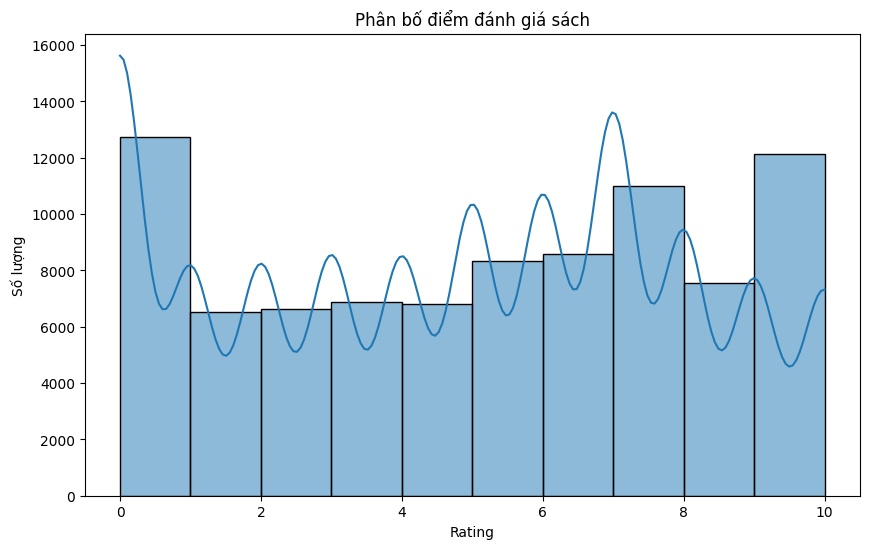

In [444]:
plt.figure(figsize=(10, 6))
sns.histplot(data_Ratings['Book-Rating'], bins=10, kde=True)
plt.title('Phân bố điểm đánh giá sách')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.show()

In [445]:
data_Ratings.shape

(87162, 3)

In [447]:
len(data_Ratings['ISBN'].unique())

2182

In [ ]:
# # Lọc những book được rating >= 50 user
# book_rating_counts = data_Ratings['ISBN'].value_counts()
# index_filtered_books = list(book_rating_counts[(book_rating_counts >= 40)].index)
# data_Ratings = data_Ratings[data_Ratings['ISBN'].apply(lambda x: x in index_filtered_books)]

# data_Ratings.shape

(70966, 3)

In [446]:
len(data_Ratings['User-ID'].unique())

1964

In [ ]:
# # Lọc những user đã rating >= 10 book và <= 250 book
# user_rating_counts = data_Ratings['User-ID'].value_counts()
# index_filtered_users = list(user_rating_counts[(user_rating_counts >= 20) & (user_rating_counts <= 250)].index)
# data_Ratings = data_Ratings[data_Ratings['User-ID'].apply(lambda x: x in index_filtered_users)]

# data_Ratings.shape

(18448, 3)

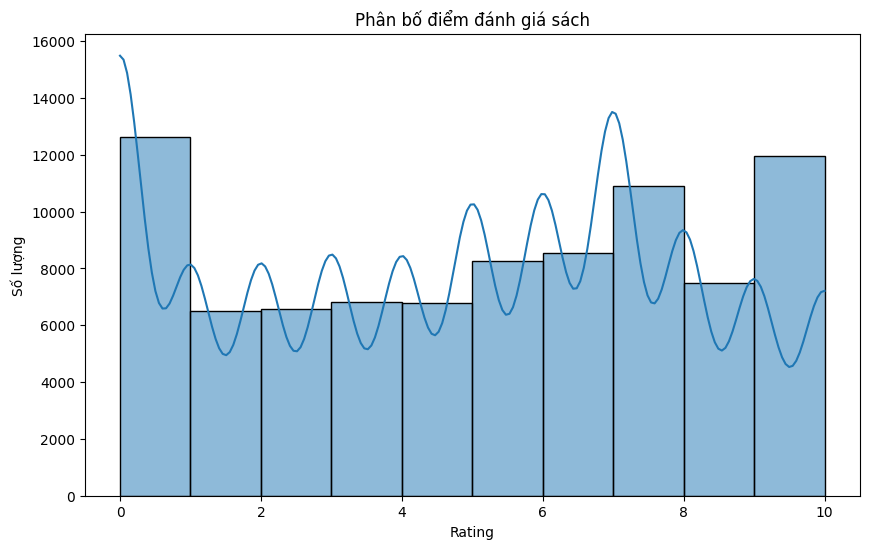

In [448]:
data_Ratings.rename(columns={'User-ID':'ID_User',
                     'ISBN':'ID_Book',
                      'Book-Rating':'Rating',},inplace=True)
data_Full = data_Users.merge(data_Books.merge(data_Ratings, on="ID_Book"), on="ID_User")
plt.figure(figsize=(10, 6))
sns.histplot(data_Full['Rating'], bins=10, kde=True)
plt.title('Phân bố điểm đánh giá sách')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.show()

In [429]:
data_Full['ID_Book'].value_counts()

ID_Book
0316666343    160
0385504209    111
0971880107    107
0142001740    107
0312195516    101
             ... 
0312979479      2
0440204887      2
0552996009      1
3492045170      1
3257228007      1
Name: count, Length: 979, dtype: int64

In [449]:
print(len(data_Full['ID_User'].unique()))
len(data_Full['ID_Book'].unique())

1964


2159

In [450]:
Utility_matrix = data_Full.pivot_table(columns='ID_User', index='ID_Book', values='Rating')
Utility_matrix

ID_User,243,254,507,638,882,1131,1424,1435,1848,1903,...,277639,277965,278026,278137,278144,278188,278418,278535,278633,278843
ID_Book,,,,,,,,,,,,,,,,,,,,,
000649840X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007110928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002026478X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0020442203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002542730X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257228007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257229534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404148665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
print(Utility_matrix.isna().sum(axis=1).sort_values())
Utility_matrix.isna().sum().sort_values()

ID_Book
0971880107    1497
0316666343    1532
0385504209    1642
0060928336    1698
0142001740    1710
              ... 
3257228007    1960
3404148665    1960
3492045170    1960
3442541751    1962
3257229534    1962
Length: 2159, dtype: int64


ID_User
135045    2017
113270    2026
174304    2031
40889     2032
157273    2035
          ... 
76499     2151
61038     2156
98391     2156
189558    2157
106849    2158
Length: 1964, dtype: int64

# Mô Hình

In [158]:
def f_cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    
    if norm_vector1 == 0 or norm_vector2 == 0:
        return 0
    
    similarity = dot_product / (norm_vector1 * norm_vector2)
    
    return similarity

class CF(object):
    def __init__(self, k, sim_func = f_cosine_similarity, mode = "uu"):    
        self.k = k
        self.sim_func = sim_func
        self.mode = mode

        self.mean_ratings = None
        self.uti_matrix_Y = None
        self.simi_matrix_Y = None
        self.matrix_Y = None       
    
    def fit(self, matrix_Y):
        self.matrix_Y = matrix_Y
        self.n_users = matrix_Y.shape[1]  # số cột user
        self.n_items = matrix_Y.shape[0]   # số hàng item
        self.normalize()
        self.compute_similarity()

    def normalize(self):
        if self.mode == "uu":
            self.mean_ratings = np.nanmean(self.matrix_Y, axis=0)  # Tính trung bình theo cột
            self.uti_matrix_Y = self.matrix_Y - self.mean_ratings 
        else:
            self.mean_ratings = np.nanmean(self.matrix_Y, axis=1)  # Tính trung bình theo hàng
            self.uti_matrix_Y = (self.matrix_Y.T - self.mean_ratings).T

        self.uti_matrix_Y = np.nan_to_num(self.uti_matrix_Y, nan=0)

    def compute_similarity(self):
        if self.mode == "uu":
            self.simi_matrix_Y = np.ones((self.n_users, self.n_users))
            for u in range(self.n_users):
                self.simi_matrix_Y[u, :] = [self.sim_func(self.uti_matrix_Y[:, u], self.uti_matrix_Y[:, j]) for j in range(self.n_users)]
        else:
            self.simi_matrix_Y = np.ones((self.n_items, self.n_items))     
            for i in range(self.n_items):
                self.simi_matrix_Y[i, :] = [self.sim_func(self.uti_matrix_Y[i, :], self.uti_matrix_Y[j, :]) for j in range(self.n_items)]

    def predict(self, u, i):
        # Dự đoán đánh giá cho user u cho item i
        if self.mode == "uu":
            users_rated_i = np.where(~np.isnan(self.matrix_Y[i, :]))[0]
            sim = self.simi_matrix_Y[u, users_rated_i]
            k_rated_sim = np.argsort(sim)[-self.k:]
            k_users_rated = users_rated_i[k_rated_sim]
            score_u = self.uti_matrix_Y[i, k_users_rated]
            score_i = sim[k_rated_sim]
        else:
            items_rated_u = np.where(~np.isnan(self.matrix_Y[:, u]))[0]
            sim = self.simi_matrix_Y[i, items_rated_u]
            k_rated_sim = np.argsort(sim)[-self.k:]
            k_items_rated = items_rated_u[k_rated_sim]
            score_u = self.uti_matrix_Y[k_items_rated, u]
            score_i = sim[k_rated_sim]
        
        pred_rating = np.sum(score_i * score_u) / np.sum(np.abs(score_i))
        
        # giá trị thực tế
        if self.mode == "uu":
            return pred_rating + self.mean_ratings[u] 
        else:
            return pred_rating + self.mean_ratings[i]

    def recommend(self, x):
        pred_ratings = []
        if self.mode == "uu":
            for i in range(self.n_items):
                if np.isnan(self.matrix_Y[i, x]):
                    pred_rating = self.predict(x, i)
                    pred_ratings.append((i, pred_rating))
        else:
            for u in range(self.n_users):
                if np.isnan(self.matrix_Y[x, u]):
                    pred_rating = self.predict(u, x)
                    pred_ratings.append((u, pred_rating))

        pred_ratings.sort(key=lambda x: x[1], reverse=True)
        top_pred_ratings = pred_ratings[:10]

        if self.mode == "uu":
            print(f"Các gợi ý cho user {x}:")
            for item, rating in top_pred_ratings:
                if rating > 5:
                    print(f"\t item {item} với giá trị dự đoán: {round(rating, 2)}")
        else:
            print(f"Các gợi ý cho item {x}:")
            for user, rating in top_pred_ratings:
                if rating > 5:
                    print(f"\t user {user} với giá trị dự đoán: {round(rating, 2)}")

        return top_pred_ratings
    






In [452]:
matrix_Y = Utility_matrix.values
model = CF(k=100, sim_func = f_cosine_similarity, mode="uu")
model.fit(matrix_Y)
idx_books = model.recommend(1)

Các gợi ý cho user 1:
	 item 710 với giá trị dự đoán: 8.86
	 item 696 với giá trị dự đoán: 8.43
	 item 1295 với giá trị dự đoán: 8.06
	 item 103 với giá trị dự đoán: 7.95
	 item 1658 với giá trị dự đoán: 7.93
	 item 1546 với giá trị dự đoán: 7.9
	 item 550 với giá trị dự đoán: 7.82
	 item 119 với giá trị dự đoán: 7.8
	 item 148 với giá trị dự đoán: 7.78
	 item 50 với giá trị dự đoán: 7.73


In [461]:
def find_index_user(Utility_matrix, user_id):
    try:
        index = Utility_matrix.columns.get_loc(user_id)
        return index
    except KeyError:
        return f"User-ID {user_id} không tồn tại."
    
def find_id_book(Utility_matrix, index):
    try:
        title = Utility_matrix.index[index]
        return title
    except KeyError:
        return f"Index title {title} không tồn tại."

matrix_Y = Utility_matrix.values
model = CF(k=500, sim_func = f_cosine_similarity, mode="uu")
model.fit(matrix_Y)
idx_books = model.recommend(find_index_user(Utility_matrix, 254))

idx_books = [item[0] for item in idx_books]
id_books = []

print("Các sách được gợi ý:")
for i in range(len(idx_books)):
    id_books.append(find_id_book(Utility_matrix, idx_books[i]))

title_books = []
for i in id_books:
    title = data_Full[data_Full['ID_Book'] == i]['Name_Book'].unique() 
    title_books.append(title[0])

img_books = []
for i in id_books:
    img_url = data_Full[data_Full['ID_Book'] == i]['Img_url'].unique() 
    img_books.append(img_url[0])
img_books

Các gợi ý cho user 1:
	 item 710 với giá trị dự đoán: 8.86
	 item 696 với giá trị dự đoán: 8.43
	 item 1295 với giá trị dự đoán: 8.06
	 item 103 với giá trị dự đoán: 7.95
	 item 1546 với giá trị dự đoán: 7.9
	 item 550 với giá trị dự đoán: 7.82
	 item 119 với giá trị dự đoán: 7.8
	 item 148 với giá trị dự đoán: 7.78
	 item 50 với giá trị dự đoán: 7.73
	 item 1887 với giá trị dự đoán: 7.69
Các sách được gợi ý:


['http://images.amazon.com/images/P/039914563X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/039480001X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0451187903.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/006109868X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0553348973.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0380001411.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/006440188X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0140143505.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0060932139.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0684814994.01.LZZZZZZZ.jpg']

In [454]:
data_Full[data_Full['ID_User'] == 254]

,ID_User,Location,ID_Book,Name_Book,Author,Year,Publisher,Img_url,Rating
56,254,usa,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,7
57,254,usa,0316769487,The Catcher in the Rye,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,4
58,254,usa,0440241413,Confessions of a Shopaholic,SOPHIE KINSELLA,2003,Dell,http://images.amazon.com/images/P/0440241413.0...,1
59,254,usa,0451526341,Animal Farm,George Orwell,2004,Signet,http://images.amazon.com/images/P/0451526341.0...,8
60,254,usa,0684833395,Catch 22,Joseph Heller,1996,Simon &amp; Schuster,http://images.amazon.com/images/P/0684833395.0...,2
61,254,usa,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,9
62,254,usa,0452277337,Le Divorce (William Abrahams Book),Diane Johnson,1997,Plume Books,http://images.amazon.com/images/P/0452277337.0...,1
63,254,usa,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,7
64,254,usa,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,3
65,254,usa,0446364762,The Stars Shine Down,Sidney Sheldon,1993,Warner Books,http://images.amazon.com/images/P/0446364762.0...,3


In [317]:
Utility_matrix

ID_User,243,244,254,638,805,882,1025,1075,1131,1424,...,277427,277523,277639,277965,278026,278356,278535,278582,278633,278843
ID_Book,,,,,,,,,,,,,,,,,,,,,
002542730X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060096195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006016848X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060173289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
0060175400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573229326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573229571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
joblib.dump(model, 'checkpoints/model.pkl')
joblib.dump(data_Full, 'checkpoints/data_Full.pkl')
joblib.dump(Utility_matrix, 'checkpoints/Utility_matrix.pkl')

['checkpoints/Utility_matrix.pkl']